In [ ]:
import requests
from pprint import pprint

BASE_URL = "http://nominatim.openstreetmap.org/search?format=json"

postcode = "557400"
response = requests.get(f"{BASE_URL}&postalcode={postcode}")
response.json()

In [ ]:
import folium

location = float(16.120711319917557), float(108.2631333549189)
m = folium.Map(location=location, width= 800, height=400)
m

In [17]:
from geopy.distance import distance
 
mile = distance((16.12714276214544, 108.25849849763885), (16.131512725584734, 108.26218921732485))

mile



Distance(0.6242597010107629)

In [18]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class line:
	def __init__(self, p1, p2):
		self.p1 = p1
		self.p2 = p2

def onLine(l1, p):
	# Check whether p is on the line or not
	if (
		p.x <= max(l1.p1.x, l1.p2.x)
		and p.x >= min(l1.p1.x, l1.p2.x)
		and (p.y <= max(l1.p1.y, l1.p2.y) and p.y >= min(l1.p1.y, l1.p2.y))
	):
		return True
	return False

def direction(a, b, c):
	val = (b.y - a.y) * (c.x - b.x) - (b.x - a.x) * (c.y - b.y)
	if val == 0:
		# Collinear
		return 0
	elif val < 0:
		# Anti-clockwise direction
		return 2
	# Clockwise direction
	return 1

def isIntersect(l1, l2):
	# Four direction for two lines and points of other line
	dir1 = direction(l1.p1, l1.p2, l2.p1)
	dir2 = direction(l1.p1, l1.p2, l2.p2)
	dir3 = direction(l2.p1, l2.p2, l1.p1)
	dir4 = direction(l2.p1, l2.p2, l1.p2)

	# When intersecting
	if dir1 != dir2 and dir3 != dir4:
		return True

	# When p2 of line2 are on the line1
	if dir1 == 0 and onLine(l1, l2.p1):
		return True

	# When p1 of line2 are on the line1
	if dir2 == 0 and onLine(l1, l2.p2):
		return True

	# When p2 of line1 are on the line2
	if dir3 == 0 and onLine(l2, l1.p1):
		return True

	# When p1 of line1 are on the line2
	if dir4 == 0 and onLine(l2, l1.p2):
		return True

	return False

def checkInside(poly, n, p):
	# When polygon has less than 3 edge, it is not polygon
	if n < 3:
		return False

	# Create a point at infinity, y is same as point p
	exline = line(p, Point(9999, p.y))
	count = 0
	i = 0
	while True:
		# Forming a line from two consecutive points of poly
		side = line(poly[i], poly[(i + 1) % n])
		if isIntersect(side, exline):
			# If side is intersects ex
			if (direction(side.p1, p, side.p2) == 0):
				return onLine(side, p);
			count += 1
		
		i = (i + 1) % n;
		if i == 0:
			break

	# When count is odd
	return count & 1;


# Driver code
polygon = [ Point( 0, 0 ), Point( 10, 0 ), Point( 10, 10 ), Point( 0, 10 ) ];
p = Point( 5, 3 );
n = 4;

# Function call
if (checkInside(polygon, n, p)):
	print("Point is inside.")
else:
	print("Point is outside.")


Point is inside.


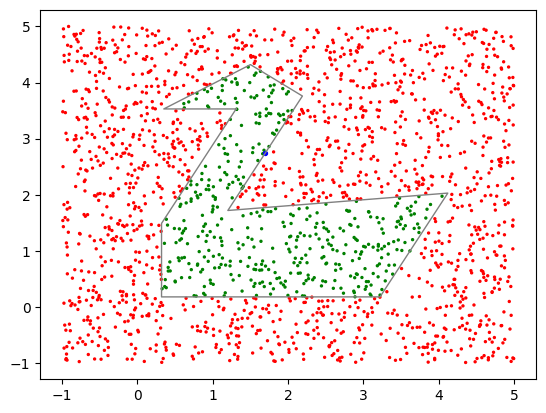

In [19]:
def ray_casting(point, polygon):
    intersections = 0
    x, y = point

    for k in range(len(polygon)-1):
        x1, y1 = polygon[k]
        x2, y2 = polygon[k+1]

        if (y < y1) != (y < y2) and\
        x < (x2-x1)*(y-y1)/(y2-y1)+x1:
            intersections += 1

    return intersections % 2 == 1

def point_on_side(point, polygon): # when the point lies on a side of the polygon
    is_on_a_side = False
    x, y = point

    for k in range(len(polygon)-1):
        x1, y1 = polygon[k]
        x2, y2 = polygon[k+1]

        if (y < y1) != (y < y2) and\
        (x < x1) != (x < x2) and\
        (x2-x1)*(y-y1)==(x-x1)*(y2-y1):
            is_on_a_side = True
            break

    return is_on_a_side



from random import uniform
from numpy import array
from matplotlib import pyplot as plt

X = []
Y = []
P = [
    [1.31,3.53], [0.32,1.49],
    [0.32,0.18], [3.22,0.18],
    [4.12,2.03], [1.2,1.72],
    [2.19,3.76], [1.5,4.32],
    [0.35,3.53], [1.31,3.53]
]
colors = []

for i in range(2000):
    x = uniform(-1, 5)
    y = uniform(-1, 5)

    X.append(x)
    Y.append(y)

    if ray_casting([x,y], P):
        colors.append('green')
    else:
        colors.append('red')



x1 = P[5][0]
y1 = P[5][1]
x2 = P[6][0]
y2 = P[6][1]

x = (x1+x2)/2
y = ((y2-y1)/(x2-x1))*(x-x1) + y1

_point_on_side = [x,y]

plt.plot(array(P)[:,0], array(P)[:,1], color='gray', linewidth = 1)

plt.scatter(X, Y, c=colors, s=2)

plt.scatter([x], [y], c='blue', s=8)

plt.show()